In [ ]:
###This function lets matplotlib display a plot in Jupyter 
%matplotlib inline

# Data Visualisation

Firstly, we will need to import the modules we intend to use. Whenever I am plotting with Seaborn, I import the four modules below as Seaborn was written to integrate with them all nicely.  `sns` is the conventional name for the Seaborn module. As always you can name the module anything you want in your own scripts but it's a good idea to stick to conventions to make your code more easily readable for others. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

## Seaborn
Seaborn is a module that is built on top of matplotlib. While matplotlib lets you build plots from the ground up in a highly customisable manner, Seaborn offers some sleek preset styles and visuals. Seaborn also has been developed with Pandas data frames in mind, and has a simpler syntax.

It would take too long to go through all the different plots that you can create using Seaborn, so instead we are going to use a few simple examples to illustrate common concepts and options for Seaborn plots.

### How to create a plot using Seaborn
As with using functions from other modules, we have to specify the function we are using is coming from the Seaborn module by calling "sns." before the name of the function. For this notebook, we are going illustrate Seaborn's tools using the iris dataset which can be obtained using Seaborn. (We can use the sns.get_dataset_names() function to get a list of the pre-built datasets available.)
From an initial look at the data below, we can see that the dataset comprises 244 observations of 7 variables (3 numerical and 4 categorical).

In [2]:
tip_data = sns.load_dataset("tips") #This requires an internet connection for the initial data download
print(tip_data.head())
print("\nThis dataframe has {} rows and {} columns.".format(*tip_data.shape))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

This dataframe has 244 rows and 7 columns.


Now, we'll walk through the typical syntax for a plotting function from Seaborn. The x- and y-axis values can be assigned directly by entering a list or numpy array (e.g. `x=[1,2,3,4]` or `x=mylist1`). However, since Seaborn is designed for easy use with Pandas, it is typical to call the dataset in use as `data=tip_data` and then call the values using their column names. Examples for a countplot and scatterplot are below. 

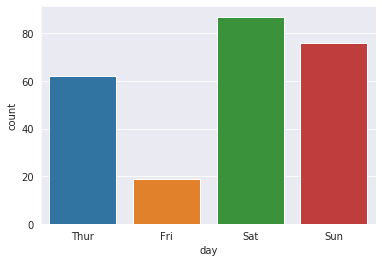

In [3]:
sns.countplot(x="day", data=tip_data)

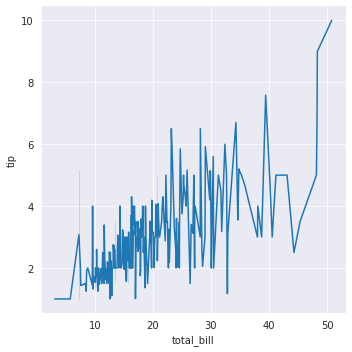

In [9]:
sns.relplot(x="total_bill", y="tip", data=tip_data, kind = "line")

`sns.relplot()` is a default plotting function that shows the relationship between two variables. We can change whether `relplot()` outputs a scatterplot or lineplot with the `kind` argument, e.g. (`kind="line"`). Many plot functions in Seaborn will have different plot types available using `kind`, which you can always find by looking at the Seaborn documentation. 

Try to edit the above plot to be a lineplot instead of scatterplot. It will look pretty ugly because this data is not suited to lineplots but this is only for demonstration.

### Marker options
Often we would like to have control over what the markers for each datapoint on a scatterplot look like. We can use the `marker`, and `s` arguments to change how the shape and size of the marker respectively. The `marker` argument takes the shorthand for different marker shapes. All of the standard shapes and their shorthand can be found [here](https://matplotlib.org/3.1.0/api/markers_api.html). 

When using the `s` argument, its hard to tell exactly what size you will get with different numbers so it's a good idea to adjust the number until you feel comfortable with the result. Try to edit the code below to see how changing `marker` and `s` can affect your plot.

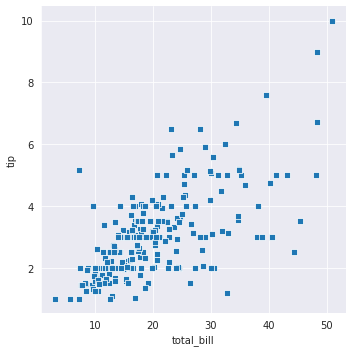

In [16]:
sns.relplot(x="total_bill", y="tip", marker="s", s=30, data=tip_data)

But what if we want one shape for one group of observations but another for a different group?

In the example below, we give a column header to the `style` argument. This is telling Seaborn that you would like to treat Lunch and Dinner markers separately. Then we can give further arguments to adjust how those markers look. The `markers` argument takes a list of the same length as the number of different categories given to `style`. Notice the difference between the `marker` and `markers` arguments. `markers` is used for when you are splitting up your data into groups.

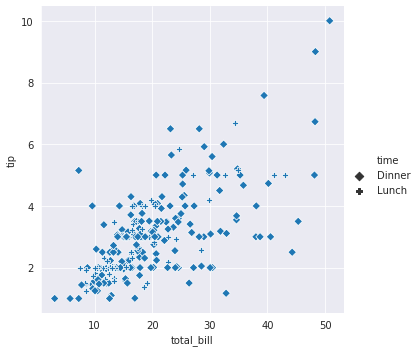

In [17]:
sns.relplot(x="total_bill", y="tip", style="time", markers=["D", "P"], data=tip_data)

You can also use size to incorporate a discrete or continuous variable in your data. Take the example below, where we adjust the size of each marker according to the number of people seated. Note the difference in `size="size"` where the `size` outside of double quotes is an argument passed to the plotting function whereas `"size"` is the name of the column in our tip_data dataset.

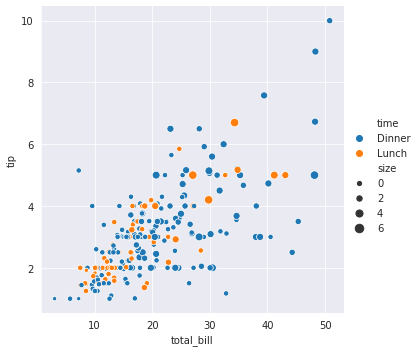

In [18]:
sns.relplot(x="total_bill", y="tip", hue="time", size="size", data=tip_data)

### Splitting plots
One of the most useful features of Seaborn is the ease with which you can add extra dimensions to your plot using colour or by dividing the data across multiple graphs according to some variable. 

In the example below using tip_data, the data have been split into two graphs: one for data collected at lunchtime, and one for dinnertime data. This was simply achieved by passing the column name of the variable you want to split on to the col argument, `col="time"`. You can pass to the `row` argument instead to have the data vertically aligned.

Similarly, adding colour as an extra dimension to your plot is as easy as giving a column name to the `hue` argument. The use of colour and different colour palettes is discussed below.

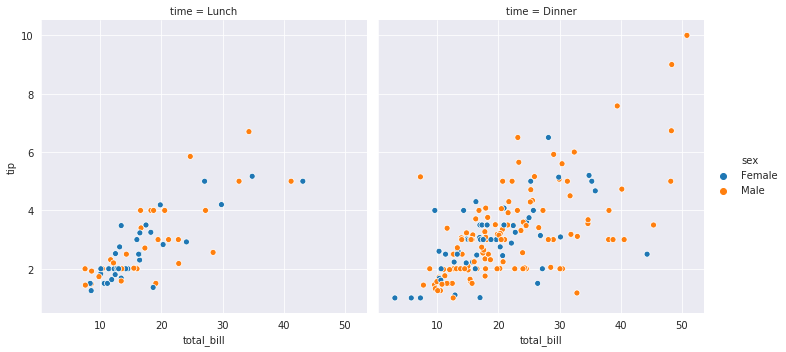

In [19]:
sns.relplot(x="total_bill", y="tip", hue="sex", col="time", data=tip_data)

Now let's say we would have too many columns to fit on one page, in this case we can wrap the plots so they appear under each other to save space. Use the `col_wrap` argument, giving it an integer for the number of plots you'd like on each row.

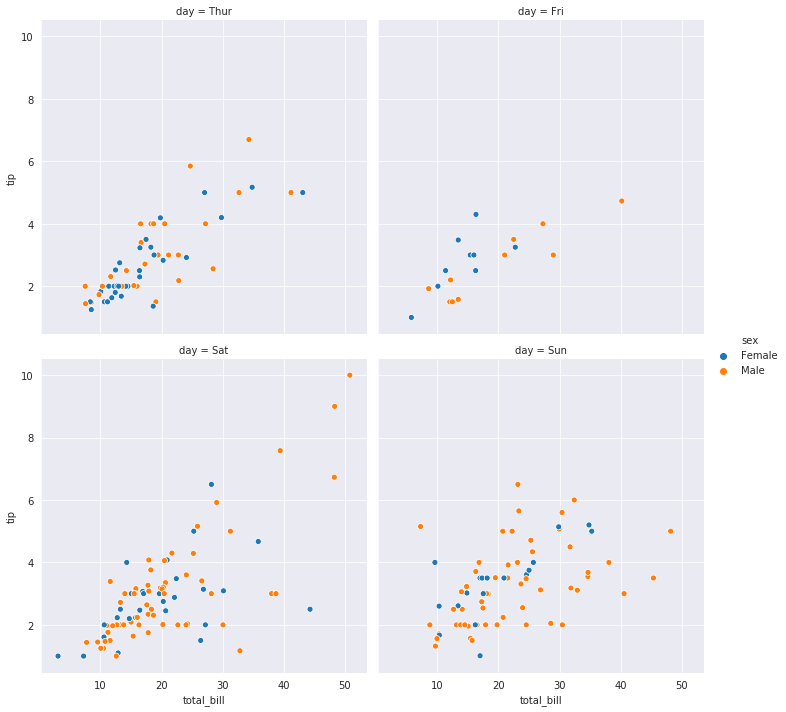

In [20]:
sns.relplot(x="total_bill", y="tip", hue="sex", col="day", col_wrap=2, data=tip_data)

### Overlaying plots
It's also possible to overlay one plot on top of another using Seaborn. For example, let's say we want to show the distribution of total_bill dependent on which day of the week it is. There are many ways to show a distribution such as histograms and rug plots, but here we are going to use a box plot. This is as simple as adding a continuous variable to plot, and a categorical variable to group data together. The `palette` argument here simply changes the default colours the plot uses.

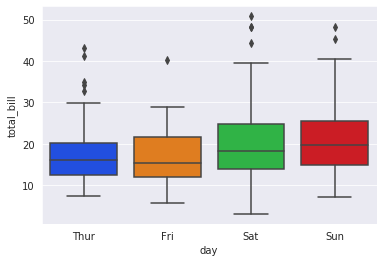

In [30]:
sns.boxplot(x="day", y="total_bill", palette="bright", data=tip_data)

This is great, we can easily see differences in medians, and the presence of outliers. But you do notice that this plot summarises the data, and you can't easily see the underlying structure of the data. 

Try the `sns.swarmplot()` plotting function. This creates a kind of univariate scatterplot where every data point is plotted but constrained so they can't overlap. OK, so now we are getting to see the data in more detail but the median and IQR markers are gone.

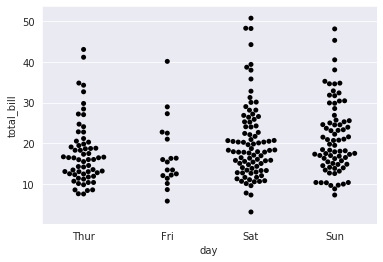

In [22]:
sns.swarmplot(x="day", y="total_bill", color="black", data=tip_data)

Well, we can display the swarm plot on top of the box plot, as simply as calling the functions one after another. The only caveat is that the swarm plot might hide some of the box plot so here we are reducing the opacity of the swarm plot, the `alpha=0.75` argument. Try changing the value of the `alpha` argument and see how it affects the plot.

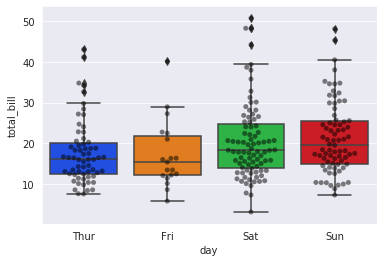

In [29]:
sns.swarmplot(x="day", y="total_bill", color="black", data=tip_data, alpha=0.5)
sns.boxplot(x="day", y="total_bill", palette="bright", data=tip_data)

### Labels, limits, and legends

By default, Seaborn will display the name of the corresponding data series from your dataframe as the x- and y- labels, and the plot will not have a title. In order to change these aspects of our plot, we first have to store the plot in a variable, here we're calling it `my_plot`. This is like giving the plot a name, so when we call functions later to modify or save the plot, we can let them know which plot we are talking about. 

In the example below, first we are subsetting our tip_data dataframe into two; one which only contains the data for lunchtime, and one which only contains dinnertime data. We call `sns.distplot()` twice: once when we plot the lunchtime data and store it into `my_plot`, and again where we specify we want to plot the dinnertime data on the same plot as above using the argument `ax=my_plot`.

The `my_plot.set()` function is where we can call labels for the x- and y-axis, and an overall title for the plot. This is actually a matplotlib function. As we can see if we call `type(my_plot)`, Seaborn plots are saved as pyplot objects, meaning many of the methods we use for pyplot can be used on Seaborn-generated plots.

[[<matplotlib.axis.YTick at 0x7f0ff45b5ed0>,
 (0, 0.08),
 (-10, 55)]

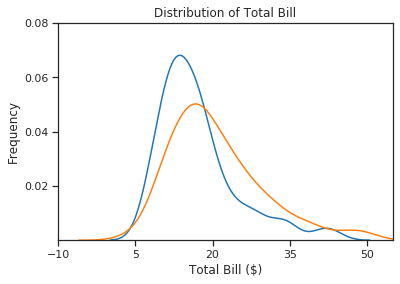

In [89]:
lunchtime_tip_data = tip_data[tip_data["time"]=="Lunch"]   #Subset data using Pandas techniques
dinnertime_tip_data = tip_data[tip_data["time"]=="Dinner"]

my_plot = sns.distplot(a=lunchtime_tip_data["total_bill"], hist=False)   #Save plot of lunchtime to my_plot
sns.distplot(a=dinnertime_tip_data["total_bill"], ax=my_plot, hist=False)#Add dinnertime plot to my_plot

my_plot.set(xlabel="Total Bill ($)", ylabel="Frequency", title="Distribution of Total Bill")
my_plot.set(xlim=[-10, 55], ylim=[0, 0.08], xticks=range(-10, 55, 15), yticks=[0.02,0.04,0.06,0.08])

If you uncomment (remove the leading '#') the last line of code of the block above, you can see that the `my_plot.set()` function can also be used to customise the limits of the plot axes, and where ticks appear. Each of the `xlim`, `ylim`, `xticks`, and `yticks` arguments accept lists as input. (The `range()` function returns a list from the first argument to the second in steps of the third. Try adjusting the numbers given to these arguments to get a feel for their influence on the plot.

If we want to display a legend within our graph, we first have to tell pyplot what to name the different plot elements, using the `label` argument. Then it is as simple as calling `my_plot.legend()`. Try adding some of the following arguments to see what they do to the legend: `loc="upper left"` `fontsize="xx_large"` `markerfirst=False` `facecolor="white"` `framealpha=0.4`

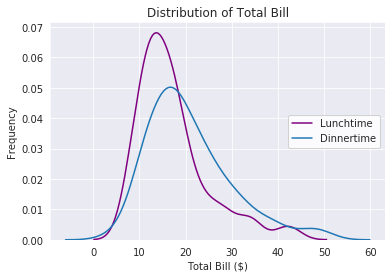

In [77]:
my_plot = sns.distplot(a=lunchtime_tip_data["total_bill"], color="purple", label="Lunchtime", hist=False)   #Save plot of lunchtime to my_plot
sns.distplot(a=dinnertime_tip_data["total_bill"], ax=my_plot, label="Dinnertime", hist=False)#Add dinnertime plot to my_plot

my_plot.set(xlabel="Total Bill ($)", ylabel="Frequency", title="Distribution of Total Bill")
my_plot.legend(loc="center right", fontsize = "10", markerfirst = True, facecolor = "white", framealpha = 0.85)

### Multiple plots in same figure

Let's say we want to create a figure with multiple plots, say a scatterplot on the left and a bar plot on the right. The easiest way to do this is to start by creating objects for the figure (the whole image) and the two axes (axes object is the name that matplotlib gives to individual plots) using pyplot. The `plt.subplots()` function returns two objects: the figure object, and a tuple containing the axes objects. We can specify the number and layout of the plots with the `nrows` and `ncols` arguments, and force them to share the same y-axis using `sharey=True`. 

It might be a bit confusing but to summarise, the example below creates 1 figure object called `fig` and 2 axes objects side-by-side called `ax1` and `ax2`. But as we see when we run the single line, the two axes objects are empty, we need to fill them with plots.

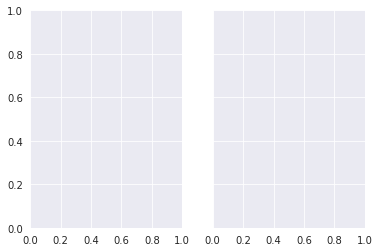

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

Now to add the data, we simply call any normal plotting function such as `sns.scatterplot()` and set the argument `ax` to the name of the axes object you want to send it to.

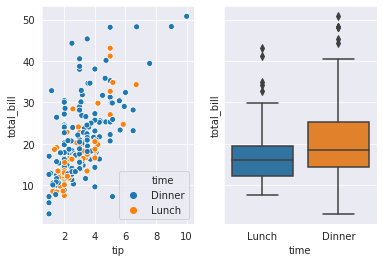

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
sns.scatterplot(x="tip", y="total_bill", hue="time", ax = ax1, data=tip_data)
sns.boxplot(x="time", y="total_bill", ax=ax2, data=tip_data)

We can add labels and titles to the individual plots as normal. Since the plots are laid on top of a figure object, we can also call on functions to customise the figure. E.g. we can use the `fig.suptitle()` function to add a figure title as well as the individual plot titles. Or use the `fig.text()` function to add a piece of text to a specified location on the figure, which can be useful for annotation.

Text(0.5, 0.8, 'Floating text')

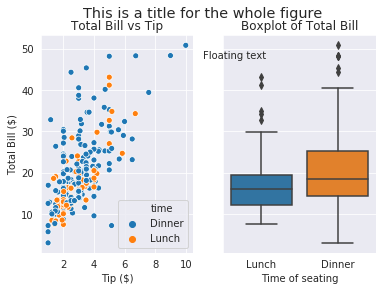

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.scatterplot(x="tip", y="total_bill", hue="time", ax=ax1, data=tip_data)            #Make first plot
ax1.set(xlabel="Tip ($)", ylabel="Total Bill ($)", title="Total Bill vs Tip") #Add labels and title

sns.boxplot(x="time", y="total_bill", ax=ax2, data=tip_data)               #Make second plot
ax2.set(xlabel="Time of seating", ylabel="", title="Boxplot of Total Bill")                               #Add labels and title
fig.suptitle("This is a title for the whole figure", fontsize="x-large")   #Add figure title
fig.text(s="Floating text", x=0.5, y=0.8)

### Customising aesthetics
 
#### Colours and colour palettes
One thing that might be confusing when starting off in Seaborn is the difference between hue, color, and palette. 
* `hue` is an argument which will add color to your data depending on some variable. 
* `color` is an argument which allows you to directly change the color of some element of the plot.
* `palette` refers to a range of colors which `hue` will select from to add color to your data.

Take a look at the examples below.

* In the first plot, we do not specify any color use, so Seaborn displays all data in the default, blue.
* In the second plot, we choose for all data to be colored purple using `color="purple"`.
* In the third plot, we use the `hue` argument to split the data into two colours depending on the variable `"time"`. Without passing anything to the `palette` argument, it will use Seaborn's default colour palette.
* In the fourth plot, we use `hue` combined with setting `palette = "pastel"` which changes the colour paletter Seaborn uses for this plot. You can also use the function `sns.set(palette="pastel")` to change the palette for all subsequent plots.
* Finally, in the fifth plot we initially create a dictionary which relates each group of the `"time"` column to a specific colour we want for that group. Then we can simply call the color_dict dictionary with the `palette` command. This is very useful if you want fine-control over the aesthetics for your figure.

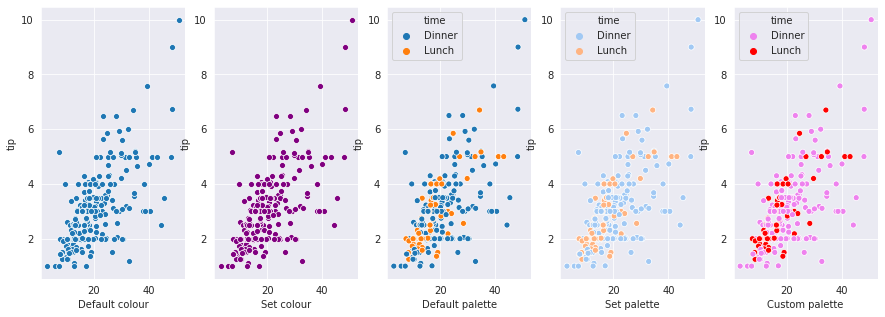

In [81]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
sns.scatterplot(x="total_bill", y="tip", ax= ax1, data=tip_data)
sns.scatterplot(x="total_bill", y="tip", color="purple", ax= ax2, data=tip_data)
sns.scatterplot(x="total_bill", y="tip", hue="time", ax= ax3, data=tip_data)
sns.scatterplot(x="total_bill", y="tip", hue="time", palette="pastel", ax= ax4, data=tip_data)
color_dict={
    "Lunch": "red",
    "Dinner": "violet"
}
sns.scatterplot(x="total_bill", y="tip", hue="time", palette=color_dict, ax= ax5, data=tip_data)
xlabels=["Default colour", "Set colour", "Default palette", "Set palette", "Custom palette"]
for i, j in enumerate([ax1, ax2, ax3, ax4, ax5]):
    j.set(xlabel=xlabels[i])

#### Styles and contexts
You may have noticed that Seaborn's standard plots look quite different from those produced by matplotlib. The darker background and lower contrast make it easier to look at on a computer screen but might not be acceptable in some publications. There are five preset styles which might be better suited for your purposes: darkgrid , whitegrid , dark , white , and ticks. Use the `sns.set_style()` function to change the style you wish to you use for all subsequent plots.

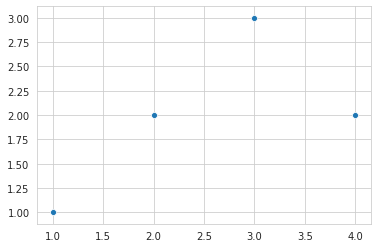

In [82]:
sns.set_style("whitegrid")
sns.scatterplot(x=[1,2,3,4], y=[1,2,3,2])

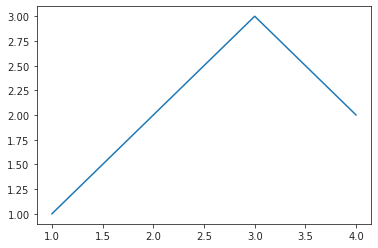

In [83]:
sns.set_style("ticks")
sns.lineplot(x=[1,2,3,4], y=[1,2,3,2])

We can use the `sns.despine()` function here to open up the graph. By default the top and right spines of the graph are removed but you can also pass a boolean such as `left=True` or `top=False` to the function to customise your spines.

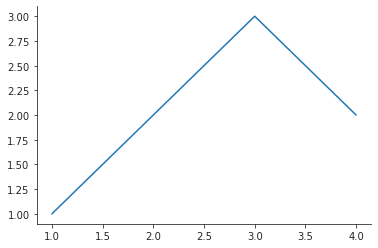

In [84]:
sns.lineplot(x=[1,2,3,4], y=[1,2,3,2])
sns.despine()

Additionally, there is the `sns.set_context()` command which allows you to choose which context you intend on displaying your plot. The possible contexts are 'paper', 'notebook', 'talk', and 'poster'. The contexts change the scale at which elements of the plot are drawn. For example, the 'poster' context scales elements up so they are more readily visible from distance. 

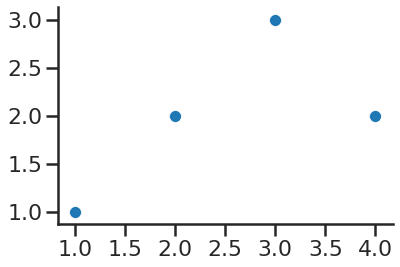

In [88]:
sns.set_context("poster")
sns.scatterplot(x=[1,2,3,4], y=[1,2,3,2])
sns.despine()

sns.set_context("notebook") ###Resetting the context back to notebook

## Extra resources

[Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)    (created by Datacamp.com)

[Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)

[Official Seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
